<a href="https://colab.research.google.com/github/Ashu7777/Keras_modeltraining/blob/main/Keras_modeltraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_labels=[]
train_samples=[]
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)


In [ ]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [ ]:
for i in scaled_train_samples:
    print(i)

[0.74712644]
[0.59770115]
[0.42528736]
[0.05747126]
[0.63218391]
[0.72413793]
[0.65517241]
[0.87356322]
[0.49425287]
[0.97701149]
[0.44827586]
[0.97701149]
[0.91954023]
[0.02298851]
[0.36781609]
[0.67816092]
[0.88505747]
[0.33333333]
[0.81609195]
[0.08045977]
[0.86206897]
[0.]
[0.37931034]
[0.70114943]
[0.68965517]
[0.51724138]
[0.43678161]
[0.55172414]
[0.18390805]
[0.4137931]
[0.32183908]
[0.79310345]
[0.08045977]
[0.62068966]
[0.64367816]
[0.54022989]
[0.65517241]
[0.88505747]
[0.16091954]
[0.93103448]
[0.40229885]
[0.47126437]
[0.11494253]
[0.09195402]
[0.14942529]
[0.97701149]
[0.82758621]
[0.42528736]
[0.5862069]
[0.50574713]
[0.74712644]
[0.02298851]
[0.28735632]
[0.17241379]
[0.35632184]
[0.74712644]
[0.59770115]
[0.34482759]
[0.77011494]
[0.2183908]
[0.]
[0.89655172]
[0.70114943]
[0.17241379]
[0.20689655]
[0.04597701]
[0.68965517]
[0.77011494]
[0.48275862]
[0.59770115]
[0.32183908]
[0.45977011]
[0.4137931]
[0.50574713]
[0.75862069]
[0.63218391]
[0.42528736]
[0.85057471]
[0.781

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#print("Num GPUs Available: ", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, verbose=2)

Epoch 1/30
210/210 - 1s - loss: 0.6556 - accuracy: 0.5529
Epoch 2/30
210/210 - 0s - loss: 0.6253 - accuracy: 0.6762
Epoch 3/30
210/210 - 0s - loss: 0.5916 - accuracy: 0.7438
Epoch 4/30
210/210 - 0s - loss: 0.5582 - accuracy: 0.7852
Epoch 5/30
210/210 - 0s - loss: 0.5246 - accuracy: 0.8138
Epoch 6/30
210/210 - 0s - loss: 0.4906 - accuracy: 0.8452
Epoch 7/30
210/210 - 0s - loss: 0.4563 - accuracy: 0.8719
Epoch 8/30
210/210 - 0s - loss: 0.4256 - accuracy: 0.8781
Epoch 9/30
210/210 - 0s - loss: 0.3981 - accuracy: 0.8886
Epoch 10/30
210/210 - 0s - loss: 0.3738 - accuracy: 0.8976
Epoch 11/30
210/210 - 0s - loss: 0.3530 - accuracy: 0.9010
Epoch 12/30
210/210 - 0s - loss: 0.3353 - accuracy: 0.9090
Epoch 13/30
210/210 - 0s - loss: 0.3208 - accuracy: 0.9095
Epoch 14/30
210/210 - 0s - loss: 0.3083 - accuracy: 0.9133
Epoch 15/30
210/210 - 0s - loss: 0.2980 - accuracy: 0.9195
Epoch 16/30
210/210 - 0s - loss: 0.2895 - accuracy: 0.9176
Epoch 17/30
210/210 - 0s - loss: 0.2828 - accuracy: 0.9210
Epoch 

In [ ]:
model.fit(
      x=scaled_train_samples
    , y=train_labels
    , validation_split=0.1
    , batch_size=10
    , epochs=30
    , verbose=2
)

Epoch 1/30
189/189 - 1s - loss: 0.2527 - accuracy: 0.9312 - val_loss: 0.1874 - val_accuracy: 0.9476
Epoch 2/30
189/189 - 0s - loss: 0.2517 - accuracy: 0.9312 - val_loss: 0.1864 - val_accuracy: 0.9476
Epoch 3/30
189/189 - 0s - loss: 0.2509 - accuracy: 0.9243 - val_loss: 0.1857 - val_accuracy: 0.9476
Epoch 4/30
189/189 - 0s - loss: 0.2507 - accuracy: 0.9312 - val_loss: 0.1848 - val_accuracy: 0.9476
Epoch 5/30
189/189 - 0s - loss: 0.2497 - accuracy: 0.9312 - val_loss: 0.1843 - val_accuracy: 0.9476
Epoch 6/30
189/189 - 0s - loss: 0.2489 - accuracy: 0.9254 - val_loss: 0.1838 - val_accuracy: 0.9571
Epoch 7/30
189/189 - 0s - loss: 0.2488 - accuracy: 0.9323 - val_loss: 0.1830 - val_accuracy: 0.9476
Epoch 8/30
189/189 - 0s - loss: 0.2482 - accuracy: 0.9307 - val_loss: 0.1824 - val_accuracy: 0.9476
Epoch 9/30
189/189 - 0s - loss: 0.2477 - accuracy: 0.9312 - val_loss: 0.1818 - val_accuracy: 0.9476
Epoch 10/30
189/189 - 0s - loss: 0.2472 - accuracy: 0.9317 - val_loss: 0.1813 - val_accuracy: 0.9476

In [ ]:
#TESTING NEW SET FROM MODEL
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [ ]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0
) 

In [ ]:
for i in predictions:
    print(i)

[0.03891546 0.9610845 ]
[0.02661414 0.9733858 ]
[0.18583815 0.81416184]
[0.9799104  0.02008964]
[0.53397226 0.46602768]
[0.02114586 0.9788542 ]
[0.02661414 0.9733858 ]
[0.15723377 0.84276617]
[0.07600892 0.923991  ]
[0.05252377 0.94747627]
[0.9796188  0.02038119]
[0.9792239  0.02077607]
[0.48361254 0.5163875 ]
[0.9790237  0.02097631]
[0.13231678 0.86768323]
[0.09501687 0.9049831 ]
[0.03608229 0.96391773]
[0.9244208  0.07557924]
[0.9794223 0.0205777]
[0.97861755 0.02138246]
[0.8755724  0.12442758]
[0.97927517 0.02072483]
[0.01678175 0.9832183 ]
[0.21829838 0.7817017 ]
[0.9694979  0.03050212]
[0.9114416  0.08855833]
[0.9779804  0.02201964]
[0.15723377 0.84276617]
[0.08825005 0.9117499 ]
[0.05657216 0.9434279 ]
[0.97927517 0.02072483]
[0.9796188  0.02038119]
[0.4335831  0.56641686]
[0.10224441 0.8977556 ]
[0.97927517 0.02072483]
[0.08825005 0.9117499 ]
[0.0310002 0.9689998]
[0.01553394 0.9844661 ]
[0.48361254 0.5163875 ]
[0.758498   0.24150199]
[0.02283401 0.97716594]
[0.67724    0.322759

In [ ]:
rounded_predictions = np.argmax(predictions, axis=-1)

for i in rounded_predictions:
    print(i)

1
1
1
0
0
1
1
1
1
1
0
0
1
0
1
1
1
0
0
0
0
0
1
1
0
0
0
1
1
1
0
0
1
1
0
1
1
1
1
0
1
0
0
0
0
0
1
1
1
1
0
0
0
0
1
0
1
1
0
1
1
1
0
1
1
0
0
1
1
0
0
0
1
0
0
1
1
0
0
1
1
1
0
1
1
0
1
0
0
0
1
1
1
0
1
0
1
1
1
0
0
0
0
0
1
0
0
1
0
0
0
1
0
0
1
0
0
0
1
1
1
1
0
0
1
0
0
1
0
0
0
0
1
1
0
1
0
1
1
0
1
0
0
1
0
1
0
1
1
1
1
0
0
1
1
0
0
0
0
0
0
1
1
0
1
0
0
0
1
1
0
0
1
1
1
0
1
0
1
1
1
1
0
1
1
1
0
0
1
1
1
0
0
1
0
0
0
0
1
1
0
0
1
0
0
0
0
1
1
0
1
0
0
1
1
1
1
0
1
1
0
1
1
1
0
0
1
1
0
1
0
1
1
1
1
0
1
1
0
0
0
1
0
1
0
0
0
1
0
0
1
0
1
0
0
0
1
1
1
1
1
1
1
0
1
1
1
0
0
1
0
1
0
0
0
0
1
1
1
1
1
0
0
1
0
1
0
1
0
1
1
0
1
0
0
0
0
1
1
0
1
1
1
1
1
0
0
1
0
1
0
1
0
0
0
1
1
0
0
1
1
0
0
1
1
1
1
1
1
0
0
0
0
0
0
1
1
1
1
0
1
1
1
0
1
0
0
0
0
0
1
1
1
1
0
1
1
1
1
0
1
1
0
1
0
0
0
0
1
1
1
1
1
1
1
1
1
0
1
0
1
0
0
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
0
0
0
0
1
1
0
0
0
1
0
1
0
1
1
1
0
0
0
0


In [ ]:
for i in predictions:
    print(i)

[0.03891546 0.9610845 ]
[0.02661414 0.9733858 ]
[0.18583815 0.81416184]
[0.9799104  0.02008964]
[0.53397226 0.46602768]
[0.02114586 0.9788542 ]
[0.02661414 0.9733858 ]
[0.15723377 0.84276617]
[0.07600892 0.923991  ]
[0.05252377 0.94747627]
[0.9796188  0.02038119]
[0.9792239  0.02077607]
[0.48361254 0.5163875 ]
[0.9790237  0.02097631]
[0.13231678 0.86768323]
[0.09501687 0.9049831 ]
[0.03608229 0.96391773]
[0.9244208  0.07557924]
[0.9794223 0.0205777]
[0.97861755 0.02138246]
[0.8755724  0.12442758]
[0.97927517 0.02072483]
[0.01678175 0.9832183 ]
[0.21829838 0.7817017 ]
[0.9694979  0.03050212]
[0.9114416  0.08855833]
[0.9779804  0.02201964]
[0.15723377 0.84276617]
[0.08825005 0.9117499 ]
[0.05657216 0.9434279 ]
[0.97927517 0.02072483]
[0.9796188  0.02038119]
[0.4335831  0.56641686]
[0.10224441 0.8977556 ]
[0.97927517 0.02072483]
[0.08825005 0.9117499 ]
[0.0310002 0.9689998]
[0.01553394 0.9844661 ]
[0.48361254 0.5163875 ]
[0.758498   0.24150199]
[0.02283401 0.97716594]
[0.67724    0.322759

In [ ]:
for i in rounded_predictions:
  print(i)

  

1
1
1
0
0
1
1
1
1
1
0
0
1
0
1
1
1
0
0
0
0
0
1
1
0
0
0
1
1
1
0
0
1
1
0
1
1
1
1
0
1
0
0
0
0
0
1
1
1
1
0
0
0
0
1
0
1
1
0
1
1
1
0
1
1
0
0
1
1
0
0
0
1
0
0
1
1
0
0
1
1
1
0
1
1
0
1
0
0
0
1
1
1
0
1
0
1
1
1
0
0
0
0
0
1
0
0
1
0
0
0
1
0
0
1
0
0
0
1
1
1
1
0
0
1
0
0
1
0
0
0
0
1
1
0
1
0
1
1
0
1
0
0
1
0
1
0
1
1
1
1
0
0
1
1
0
0
0
0
0
0
1
1
0
1
0
0
0
1
1
0
0
1
1
1
0
1
0
1
1
1
1
0
1
1
1
0
0
1
1
1
0
0
1
0
0
0
0
1
1
0
0
1
0
0
0
0
1
1
0
1
0
0
1
1
1
1
0
1
1
0
1
1
1
0
0
1
1
0
1
0
1
1
1
1
0
1
1
0
0
0
1
0
1
0
0
0
1
0
0
1
0
1
0
0
0
1
1
1
1
1
1
1
0
1
1
1
0
0
1
0
1
0
0
0
0
1
1
1
1
1
0
0
1
0
1
0
1
0
1
1
0
1
0
0
0
0
1
1
0
1
1
1
1
1
0
0
1
0
1
0
1
0
0
0
1
1
0
0
1
1
0
0
1
1
1
1
1
1
0
0
0
0
0
0
1
1
1
1
0
1
1
1
0
1
0
0
0
0
0
1
1
1
1
0
1
1
1
1
0
1
1
0
1
0
0
0
0
1
1
1
1
1
1
1
1
1
0
1
0
1
0
0
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
0
0
0
0
1
1
0
0
0
1
0
1
0
1
1
1
0
0
0
0


In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[191  19]
 [  9 201]]


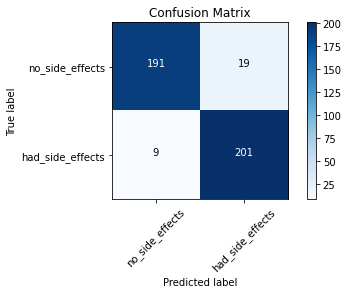

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [ ]:
model.save('RBL/Deeplizard_Keras.h5')

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('RBL/Deeplizard_Keras.h5')

In [ ]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_3_input"}}, {"class_name": "Dense", "config": {"name": "dense_3", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_4", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "

In [ ]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [ ]:
model_architecture.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.save_weights('RBL/Deeplizard_Keras.h5')

In [ ]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

model2.load_weights('RBL/Deeplizard_Keras.h5')